<a href="https://colab.research.google.com/github/Patrick925381/ZQKI/blob/main/Kopie_von_B3_Daten_aufbereiten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Förderhinweis

Dieses Dokument ist Teil des Lehrmaterials für die **Zusatzqualifikation KI und Maschinelles Lernen.**

Die Entwicklung und Erprobung dieses Bildungsangebotes wurde vom Bundesministerium für Bildung und Forschung im Rahmen des InnoVET-Programms gefördert.

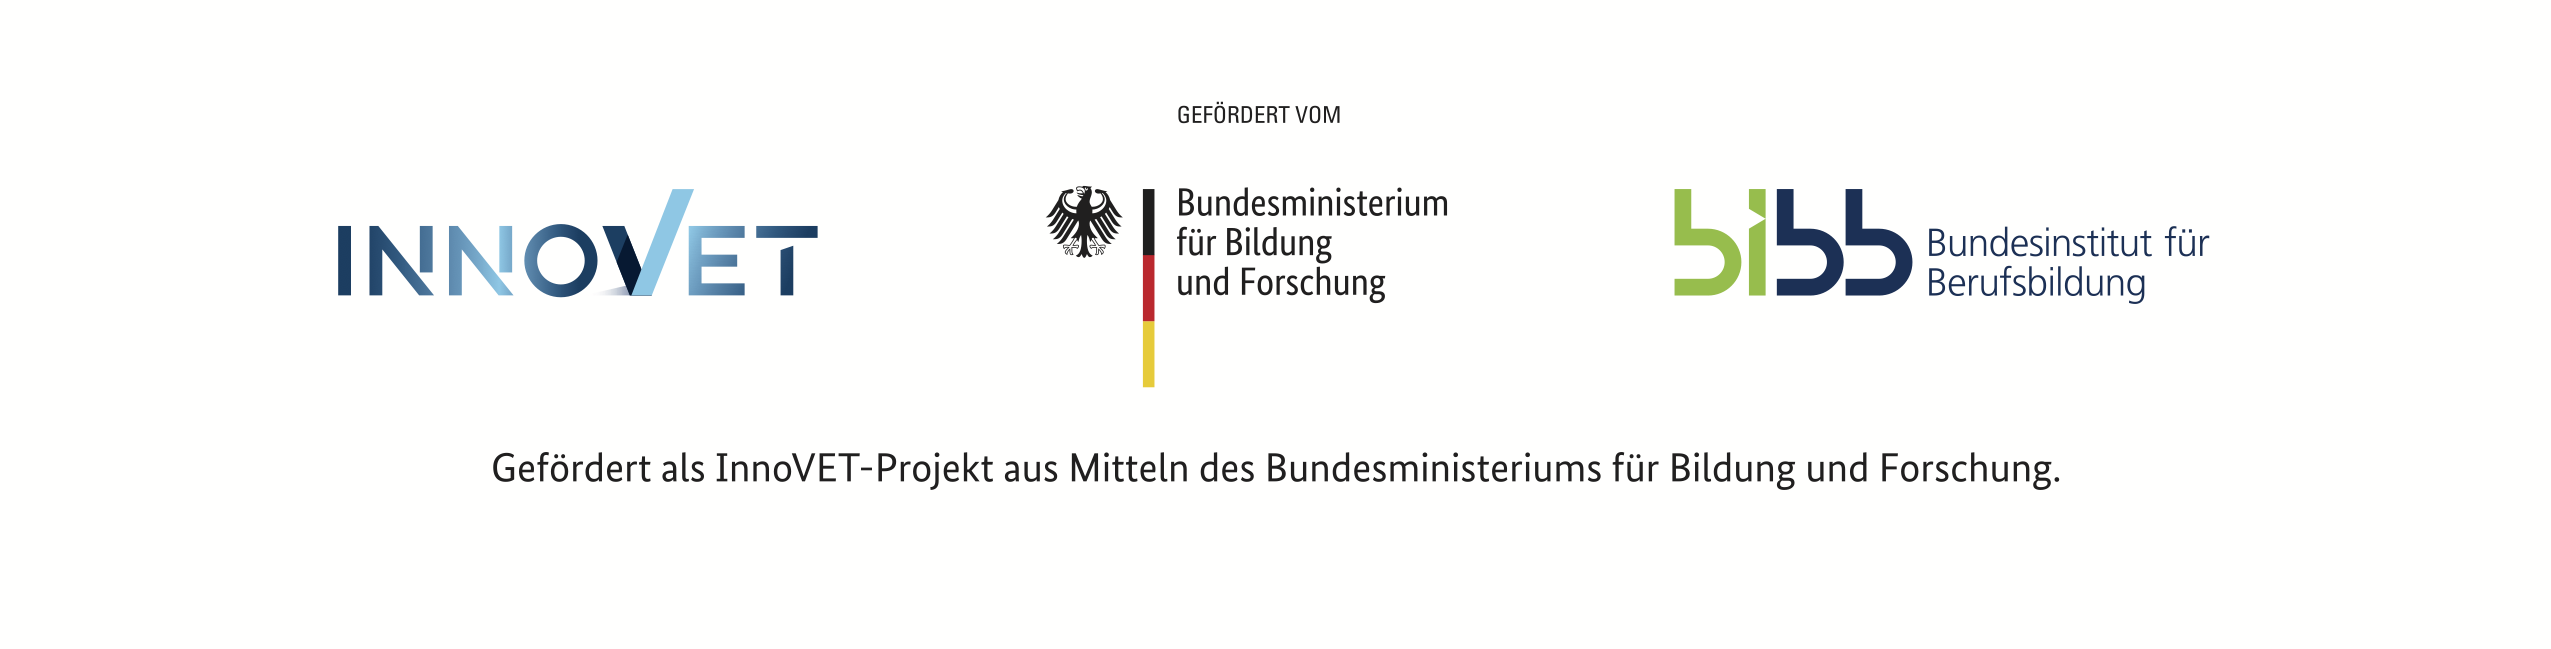

# Lizenzhinweis

Dieses Notebook "Daten aufbereiten" wurde von Antje Schweitzer, KI B3 / Universität Stuttgart, erstellt.

Das Werk, mit Ausnahme der oben abgebildeten Förderlogos, ist lizenziert unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.de) (Namensnennung 4.0 International)

# Daten aufbereiten

In diesem Notebook geht es darum, Tabellen zu verändern - zum Beispiel durch das Verändern von Werten oder das Erzeugen neuer Spalten. Dies ermöglicht es auch, Daten aus verschiedenen Quellen zusammenzuführen, um für die Datenanalyse mehr Informationen zur Verfügung zu haben. Beides sind Aspekte, die häufig benötigt werden, wenn man Daten für das Training eines Modells vorbereitet.

Im [letzten Notebook](https://colab.research.google.com/drive/1JNKqyvvVUzVo2sKqNURp9Yy9R4i0fr_M?usp=sharing) haben wir bereits einfache statistische Analysen gesehen; dies wollen wir hier noch weiter ausbauen.

## Tipp zum Umgang mit längeren Notebooks

Bei längeren Jupyter Notebooks wie diesem hier kommt es häufig vor, dass man sie nicht in einer Sitzung durcharbeitet. Steigt man aber später weiter unten ein, sind oft die Ergebnisse aus den oberen Abschnitten nicht mehr vorhanden - die Daten sind also z.B. nicht mehr geladen.

Sie können in solchen Fällen einfach alle Zellen bis zu der Zelle, bei der Sie wieder einsteigen, noch einmal ausführen. Den Befehl zum Ausführen bis zur aktuellen Zelle finden Sie im Menü unter `Laufzeit -> Ausführung vor Zelle.`

## Terminologie: Instanzen und Features

Bevor wir wieder Daten ansehen, führen wir noch kurz etwas Terminologie ein. Daten, die für maschinelles Lernen genutzt werden, werden meist in Tabellen organisiert. Dabei hat es sich im Bereich Machine Learning etabliert, die Zeilen als "Instanzen", also als "Fälle", zu verstehen, und die Werte in den Spalten als die "Eigenschaften" oder "Features" (deutsch: "Merkmale") dieser Instanzen. Im Bereich relationale Datenbanken spricht man meist von "Datensätzen" statt von Instanzen und von "Attributen" statt Features.

Jedenfalls gehören also immer die Daten in einer Zeile zusammen und bilden eine Instanz oder einen Datensatz. Die verschiedenen Werte innerhalb einer Zeile sind daher normalerweise unterschiedliche Typen, da sie verschiedene Eigenschaften der Instanz beschreiben. Die Werte innerhalb einer Spalte geben dagegen für alle Instanzen immer dieselbe Eigenschaft an und sind daher meist vom selben Typ.

So haben wir zum Beispiel in der Mini-Tabelle vom letzten Notebook drei Instanzen (oder auch Fälle, oder Datensätze) von Personen, und in den Spalten stehen deren Eigenschaften:

```
Janina, 23, Joghurt
Max, 17, Pistazie
Özlem, 21, Erdbeer
```

Die Daten innerhalb einer Zeile gehören also hier zusammen; sie beschreiben jeweils eine Person. So beschreibt Zeile eins die Person Janina - die Daten geben für sie die Features Name, Alter, und Lieblingseis an, und die Werte für diese Features sind teils Strings und teils Zahlen. Im Prinzip stehen in dieser einen Zeile alle Informationen, die wir über Janina haben.

Die Daten innerhalb einer Spalte gehören zu verschiedenen Instanzen, aber alle zum selben Feature und sind insofern meist vom selben Typ: so sind alle Werte für das Feature *Alter* hier zum Beispiel natürliche Zahlen, während alle Werte für das Feature *Lieblingseis* Strings sind.

---

**Beim maschinellen Lernen bezeichnet man einzelne "Fälle" in den Daten als "Instanzen" und deren unterschiedliche Eigenschaften als "Features". Üblicherweise stellen die Zeilen in Tabellen Instanzen dar; die Spalten geben dann die verschiedenen Features der Instanzen an.**

**In der Terminologie relationaler Datenbanken bezeichnet man Instanzen als "Datensätze" und Features als "Attribute".**

---




## Ausreißer behandeln

Manchmal finden sich in Daten Ausreißer, also Datenpunkte, die sehr aus dem Rahmen fallen bzw. sehr unerwartet sind. Es ist sehr wichtig, sich anzusehen, ob es solche Ausreißer gibt, und zu entscheiden, was mit ihnen geschehen soll:

* Sollen sie beibehalten werden?
* Sollen sie als NA-Werte gehandhabt werden?
* Sollen die entsprechenden Instanzen komplett ignoriert bzw. gelöscht werden?

---

**Ausreißer sind Datenpunkte, die - verglichen mit den anderen Werten - sehr aus dem Rahmen fallen.**

---

Die Wetterdaten, die Sie zuletzt bearbeitet haben, waren bereits vorbereitet. Wie Sie sich vielleicht erinnern, fehlten dort für manche Fälle, also für manche Instanzen, Werte für die Bewölkung - falls Sie nochmal nachsehen wollen, finden Sie das Notebook [hier](https://colab.research.google.com/drive/1JNKqyvvVUzVo2sKqNURp9Yy9R4i0fr_M?usp=sharing). In den Originaldaten dazu waren die fehlenden Werte für Bewölkung ursprünglich durch die Zahl -999 gekennzeichnet, aber in den Daten, die wir geladen haben, war bereits die -999 durch NA ersetzt worden.

Um zu rekonstruieren, was passiert wäre, wenn wir direkt mit den Originaldaten gearbeitet hätten, ersetzen wir nun doch noch einmal die NA-Werte in den Wetterdaten durch -999, um ausprobieren zu können, wie wir mit den usrprünglichen Daten gearbeitet hätten. Wie man Werte ersetzt, ist für Sie neu, und wird später weiter unten auch nochmal ausführlicher erklärt. Aber wie die Zeilen mit den NAs überhaupt erst mal lokalisiert werden, sollte Ihnen vom letzten Notebook her noch bekannt vorkommen - das ist unten im Code mit a) bezeichnet. Die eigentliche Ersetzung passiert dann unter b).

In [1]:
import pandas
# Wetterdaten laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)

# fehlende Bewölkungswerte finden und durch -999 ersetzen:
# a) Zeilen mit NA finden und entsprechenden Booleschen Vektor speichern
fehlende_werte = wetter['Wolken'].isna()
# b) der Spalte Wolken in diesen Zeilen den Wert -999 zuweisen
wetter.loc[fehlende_werte,'Wolken']=-999

wetter

,Datum,Max,Wolken
0,2009-07-01,28.7,3.0
1,2009-07-02,29.5,2.3
2,2009-07-03,28.5,3.9
3,2009-07-04,27.9,2.8
4,2009-07-05,26.6,5.5
...,...,...,...
4012,2020-06-25,26.5,1.1
4013,2020-06-26,29.8,3.6
4014,2020-06-27,28.8,3.6
4015,2020-06-28,25.7,6.9


In einem Fall wie diesem ist es ganz besonders wichtig, die Daten anzusehen, bevor man mit ihnen arbeitet, wie Sie im Folgenden sehen werden. Zunächst mal sehen die Daten oben nämlich unauffällig aus - die ersten und letzten 5 Werte für Max entsprechen sinnvollen Temperaturen, und die Werte für die Bewölkung scheinen grob im Bereich von Null bis zehn zu liegen - hier jedenfalls sehen wir nur Werte zwischen 1 und 7.

Für eine erste genauere Inspektion nutzen wir nun die `describe()` Methode:

In [2]:
wetter.describe()

,Max,Wolken
count,4017.000000,4017.000000
mean,15.538860,0.205078
std,8.761799,72.482492
min,-10.100000,-999.000000
25%,8.600000,3.900000
50%,15.700000,6.200000
75%,22.300000,7.500000
max,38.800000,8.000000


Hier fällt jetzt hoffentlich auf, dass das Minimum von -999 ein komischer Wert für Wolken ist, wenn wir doch in ersten und letzten Zeilen der Daten oben sehen konnten, dass die Werte eher im einstelligen positiven Bereich sind. Eine sinnvolle Möglichkeit wäre nun, sich anzusehen, welche Werte für die Bewölkung überhaupt unter 0 sind. Versuchen Sie das in der nächsten Code-Zelle selbst zu tun. Wie Sie vorgehen können, wird nochmal kurz erklärt.

### Do it yourself: negative Wolkenwerte untersuchen



Das Handwerkszeug zum Untersuchen der negativen Wolkenwerte sollten Sie vom letzten Notebook kennen: Bauen Sie sich erst den Booleschen Vektor, der für alle Zeilen ein True enthält, in denen der Wert für Wolken negativ, also < 0, ist. Ziehen Sie damit nur diese Zeilen aus der Tabelle heraus und wenden Sie auf das Ergebnis `describe()` an, indem Sie es einfach mit einem Punkt dahinterschreiben.

Wenn Sie Hilfe brauchen, finden Sie die Lösung ganz unten im Notebook unter Lösungen für die Do-it-yourself-Aufgaben.

In [7]:
# Schreiben Sie den Code hier hin
unter_0 = wetter["Wolken"]<0
# Zeilen mit negativen Werten für Bewölkung
wetter.loc[unter_0]

# nur diese Zeilen nehmen und darauf describe anwenden:
wetter.loc[unter_0].describe()



,Max,Wolken
count,21.000000,21.0
mean,20.019048,-999.0
std,8.177018,0.0
min,3.800000,-999.0
25%,17.100000,-999.0
50%,21.700000,-999.0
75%,26.300000,-999.0
max,34.400000,-999.0


Wenn Sie die Aufgabe korrekt bearbeitet haben, sehen Sie, dass die negativen Werte den Mittelwert -999 haben, und dass ebenso Minimum und Maximum -999 sind - mit anderen Worten: *alle* Werte unter 0 sind genau -999. Andere negative Werte gibt es nicht. Das legt nahe, dass es sich bei den -999 nicht um echte Messwerte handelt.

Und tatsächlich findet man in der Dokumentation der Daten, die der Deutsche Wetterdienst ebenfalls zur Verfügung stellt, den Hinweis, dass fehlende Werte den Wert -999 bekommen haben.

Warum ist es denn nun so wichtig, diese Werte nicht zu übersehen? Stellen Sie sich vor, Sie haben nicht Bewölkungswerte, sondern Klassenarbeitsnoten, und fehlende Werte (z.B. wegen bei wg. Krankeit verpassten Arbeiten) sind -999. Nun wollen Sie ein Modell trainieren, das lernen soll, die Note anhand der Anwesenheitszeiten in der Schule vorherzusagen. Bei den Schulnoten gilt ja eigentlich: je niedriger, desto besser. Wenn Sie nun nicht vorher die -999-er Werte eliminieren, wird das Modell lernen, dass die Note besonders niedrig wird (ja, sogar negativ wird 😆), wenn man wegen Krankheit nicht anwesend war! Je nach KI-Modell kann es auch schlecht sein, extrem hohe negative oder extrem hohe positive Werte zu haben, wenn die restlichen Werte eher nahe der Null liegen - das liegt daran, wie der Fehler beim Trainieren berechnet wird. Diesen Aspekt werden Sie allerdings erst später beurteilen können, wenn Sie gelernt haben, wie solche Modelle trainiert werden. Wir halten hier nur fest:



---

**Ausreißer können beim Training von KI-Modellen Probleme machen und sollten daher vorher unbedingt identifiziert und evtl. eliminiert werden.**

---

Wie hätte man noch herausfinden können, dass diese Datenpunkte "verdächtig", also Ausreißer, sind? Eine einfache Methode, die wir im nächsten Abschnitt ansehen, ist das Erzeugen von sogenannten Histogrammen.

### Histogramme zur Untersuchung von Werten

Histogramme sind Diagramme, die anzeigen, wie häufig bestimmte Zahlenwerte in den Daten vorkommen. Sehen wir uns die Histogramme für die Wetterdaten an. Dafür bietet `pandas` eine Methode für DataFrames, die `hist()` heißt:

array([[<Axes: title={'center': 'Max'}>,
        <Axes: title={'center': 'Wolken'}>]], dtype=object)

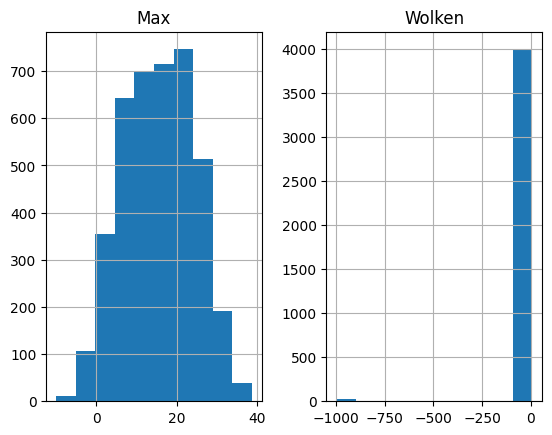

In [8]:
# Histogramm für die Wetterdaten erzeugen
wetter.hist()

Wir bekommen also 2 Histogramme; eines für die Höchsttemperatur (die Werte aus der Spalte namens "Max") und eines für die Wolken. Sie zeigen für verschiedene Bereiche von Werten senkrechte Balken. Die Höhe der Balken gibt dabei an, wie viele Werte in diesem Bereich lagen. Man kann hier sofort sehen, dass sich die Werte für Max über viele zusammenhängende Bereiche verteilen, und zwar von unter 0 bis knapp unter 40 Grad, und dass die Balken im mittleren Bereich höher sind, dass also Werte im mittleren Bereich hier häufiger waren.

Das Histogramm für die Wolken zeigt dagegen eine eigenartige Verteilung: man sieht einerseits einen winzigen, kaum zu entdeckenden Balken bei um die -1000, der zeigt, dass es sehr wenige Werte in diesem Bereich gibt (die genaue Zahl kann man mit bloßem Auge hier nicht ablesen). Ein einziger weiterer Balken bei um die 0 enthält alle anderen Werte, nämlich um die 4000, wie man links an der Skala ablesen kann.

Bevor wir diese seltsame Verteilung auf nur 2 Bereiche von Werten genauer ansehen, sollte man wissen, wie die Histogramme erstellt werden. Sehen wir zunächst das Histogramm für Max an.

Die Daten für Max reichen von -10.1 bis 38.8 Grad - das konnte man oben der Ausgabe von `describe()` entnehmen. Für die Erstellung des Histogramms teilt `pandas` diesen Bereich in 10 Intervalle oder Unterbereiche ein - auf Deutsch spricht man hier manchmal von Klassen, d.h., der Wertebereich von Max wird in 10 Klassen aufgeteilt.  Auf Englisch sagt man dazu "bins", und dieses Wort wird auch auf Deutsch häufig genutzt: der Wertebereich wird in 10 Bins aufgeteilt. Andere Statistik-Programme als `pandas` (z.B. auch Excel) gehen ähnlich vor (möglicherweise mit mehr oder weniger Klassen, sonst aber analog).

---

**Histogramme zeigen, wie sich Zahlenwerte über einen Wertebereich verteilen. Beim Erstellen von Histogrammen wird der vorhandene Wertebereich in mehrere Intervalle (sogenannte Bins) aufgeteilt. Im Histogramm wird jedes Intervall durch einen senkrechten Balken dargestellt. Die Höhe des Balkens zeigt an, wie viele Werte in diesem Intervall liegen.**

---




Wenn man nichts anderes spezifiert, macht `pandas` diese Aufteilung in 10 gleich große Bins. Für die Daten in der Spalte Max heißt das, der Bereich von -10.1 bis 38.8 wird in folgende 10 Bins aufgeteilt:

* -10.14 bis -5.21
* -5.21 bis -0.32
* -0.32 bis 4.57
* 4.57 bis 9.46
* 9.46 bis 14.35
* 14.35 bis 19.24
* 19.24 bis 24.13
* 24.13 bis 29.02
* 29.02 bis 33.91
* 33.91 bis 38.8

Bei diesen Angaben gehört die obere Grenze immer gerade nicht mehr zu diesem Intervall, d.h., die -5.21 gehört gerade nicht mehr in das erste Intervall; dazu gehören nur Werte, die kleiner als -5.21 sind. Alles ab inklusive -5.21 gehört dann ins zweite Intervall.


> Anmerkung: Wer mit den Python-Befehlen bisher sehr gut klar kommt und dies gerne überprüfen möchte, kann mittels
>
> ```
> pandas.cut(wetter['Max'], bins=10,retbins=True)
> ```
>
> Details zu den Bins anzeigen lassen - hier muss allerdings explizit angegeben werden, dass man 10 Bins haben möchte - das ist die Anzahl Bins, die man beim Histogramm bekommt, wenn man nichts anderes angibt. Der Ausgabe kann man dann entnehmen, in welches Intervall welcher Datenpunkt fällt (gekürzt), und auch, von wo bis wo die Intervalle jeweils gehen.

Im Histogramm für die Temperaturen entspricht also jedes dieser Intervalle (jedes dieser Bins) einem Balken. Wir können nun auch noch überprüfen, ob die Höhe der Balken tatsächlich der Anzahl der Werte in den Bins entspricht. Zählen wir also zum Beispiel, wie viele Werte im zweiten Bin liegen. Dafür brauchen wir einen Booleschen Vektor, der für alle Max-Werte zwischen -5.21 und -0.32 True liefert. Dafür müssen wir noch lernen, wie man logische Ausdrücke miteinander verknüpfen kann.



#### Verknüpfung von logischen Ausdrücken

Bisher haben wir Boolesche Vektoren nur erzeugt, indem wir genau eine Bedingung formuliert haben, z.B. `eissorten['Alter']>20`.  Diesmal haben wir aber zwei Bedingungen, die gelten sollen: `Max` soll sowohl größer oder gleich -5.21 sein als auch kleiner als -0.32. Wir brauchen jetzt also noch die Möglichkeit, zwei logische Ausdrücke miteinander zu verknüpfen. Dies ist ganz einfach: das Kaufmanns-Und & zeigt an, dass beide Ausdrücke True sein müssen, damit die ganze Bedingung True ist. Dabei schreibt man die verknüpften Ausdrücke in Klammern. So wären also z.B. folgende Ausdrücke True, weil beide Teil-Ausdrücke True sind:

* (7>4) & (8>3)
* (7==7) & (3<5)
* pandas.isna(numpy.nan) & True

Dagegen wären folgende Ausdrücke insgesamt False, weil mindestens ein Teil-Ausdruck False ist:

* (4<3) & (8>3)
* (7==7) & (5<3)
* pandas.isna(2) & True

Es gibt außerdem eine Oder-Verknüpfung - in dem Fall ist der Wert schon dann True, wenn auch nur einer der beiden Teil-Ausdrücke True ist (oder natürlich, wenn beide True sind). Ansonsten bekommt man False. Das Zeichen für den Oder-Operator ist "|". Damit wären folgende Ausdrücke alle True:

* (4<3) | (8>3)
* (7==7) | (5<3)
* pandas.isna(2) | True

Zusammenfassend also:



---

**Logische Ausdrücke können mit "und" bzw. "oder" verknüpft werden. Das Zeichen für "und" ist &, und das Zeichen für "oder" ist |. Die Teil-Ausdrücke werden in Klammern geschrieben. Das Ergebnis für mit & verknüpfte Teil-Ausdrücke ist nur dann True, wenn beide Teile True sind. Das Ergebnis für mit | verknüpfte Teil-Ausdrücke ist True, wenn mindestens einer oder beide Teile True sind.**

---



#### Do it yourself: Daten in einem bestimmten Bereich anzeigen lassen

Wenden Sie das Gelernte an: zeigen Sie die Datensätze an, bei denen die Höchsttemperatur im angenehmen Bereich von 23 bis 24 Grad lag, genauer gesagt, bei dem die Temperatur mindestens 23 und nicht mehr als 24 Grad betrug. Sie müssen diese beiden Bedingungen (mindestens 23 einerseits, maximal 24 andererseits) also mit einem & verknüpfen.

An wie vielen Tagen war das Wetter entsprechend?

In [14]:
# Vektor für Tage mit mindestens 23 und nicht mehr als 24 Grad
vektor_23_24 = (wetter["Max"]>23) & (wetter["Max"]<24)
print(wetter.loc[vektor_23_24, "Max"].count())


# diese Daten anzeigen lassen:
wetter.loc[vektor_23_24, "Max"]
# Anzahl der Zeilen wird unterhalb der ausgegebenen Daten angezeigt


# wer will, kann die Anzahl der Zeilen mithilfe von count() auch direkt ausgeben lassen:
# siehe dazu Musterlösung unten


125


,Max
11,23.9
16,23.7
19,23.5
30,23.3
53,23.5
...,...
3735,23.4
3742,23.9
3933,23.1
3944,23.6


#### Daten in einem Bin anzeigen lassen

Damit kann man nun einen Ausdruck angeben, der nur `True` ist, wenn der Max-Wert im zweiten Intervall liegt, nämlich:

(wetter['Max']>=-5.21) & (wetter['Max']<-0.32)

Und wir können nun damit indizieren, und anschließend `describe()` verwenden, um eine Zusammenfassung über die Daten in diesem Bereich zu bekommen.




In [15]:
# Vektor zur Indizierung: True für alle Werte im zweiten Intervall
intervall_zwei = (wetter['Max']>=-5.21) & (wetter['Max']<-0.32)
# Die Beschreibung für alle Max-Werte im zweiten Intervall anzeigen:
wetter.loc[intervall_zwei,'Max'].describe()


,Max
count,106.000000
mean,-1.890566
std,1.182856
min,-5.200000
25%,-2.800000
50%,-1.700000
75%,-0.900000
max,-0.400000


Der Ausgabe von `describe()` können wir also entnehmen, dass die Werte tatsächlich in diesem Intervall liegen, denn das Minimum in den obigen Werten ist -5.2, und das Maximum ist -0.4. Anschließend können wir jetzt noch zählen, wie viele Werte es waren:

In [16]:
wetter.loc[intervall_zwei,'Max'].count()

np.int64(106)

Und das entspricht der Höhe des Balkens im Histogramm (wir schauen uns hier nur das Histogramm für Max an, indem wir die Spalte als Argument angeben): der zweite Balken endet knapp oberhalb von 100.

array([[<Axes: title={'center': 'Max'}>]], dtype=object)

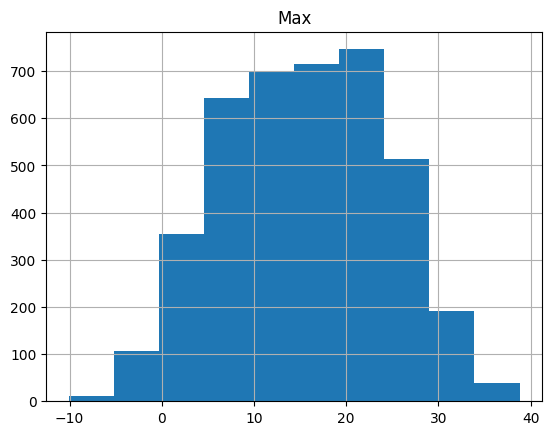

In [17]:
wetter.hist('Max')

Mit Histogrammen kann man auch Ausreißer aufspüren: sehen wir uns die Spalte für die Wolken nochmal im Histogramm an:

array([[<Axes: title={'center': 'Wolken'}>]], dtype=object)

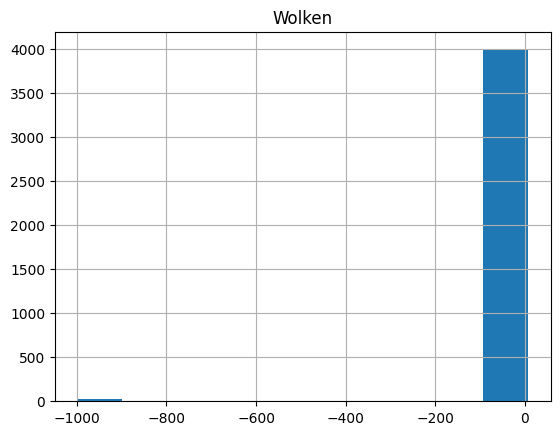

In [18]:
wetter.hist('Wolken')

Hier sehen wir, dass extrem wenige Daten im ersten Bin gelandet sind; dazwischen sind 8 Bins, die leer zu sein scheinen, jedenfalls ist kein Balken erkennbar. Und alle restlichen Daten sind im letzten Bin. Ein solches Histogramm sollte bei der Datenanalyse zu denken geben. Optimalerweise versucht man spätestens dann die Dokumentation zu den Daten genau anzusehen, ob sich hier möglicherweise Hinweise finden.

---

**Mit Histogrammen kann man Ausreißer aufspüren.**

---



### Boxplots zur Untersuchung von Werten

Eine weitere Möglichkeit, einen Überblick über den Wertebereich zu bekommen, sind Boxplots. Sehen wir uns dazu nochmal die Spiel-Daten zur Lieblingseissorte an und ergänzen noch ein paar Datensätze:

In [19]:
# Numpy, um NA angeben zu können
import numpy

# Das Dictionary definieren
dict = { 'Name': ['Janina', 'Max', 'Özlem', 'Yannick', 'Lea', 'Sveta', 'Ahmed', 'Olivia','Maya','Sascha'],
        'Alter': [ 23, 17, 21, 18, 16, 16, 24, 21, 20, numpy.nan],
        'Lieblingseis': ['Joghurt', 'Pistazie', 'Erdbeer', 'Schoko', 'Schoko', 'Erdbeer', 'Erdbeer', 'Joghurt','Vanille','Schoko']}
# in DataFrame umwandeln
eissorten = pandas.DataFrame(dict)
eissorten


,Name,Alter,Lieblingseis
0,Janina,23.0,Joghurt
1,Max,17.0,Pistazie
2,Özlem,21.0,Erdbeer
3,Yannick,18.0,Schoko
4,Lea,16.0,Schoko
5,Sveta,16.0,Erdbeer
6,Ahmed,24.0,Erdbeer
7,Olivia,21.0,Joghurt
8,Maya,20.0,Vanille
9,Sascha,NaN,Schoko


Wir erstellen dann einen Boxplot mithilfe der Methode `boxplot()`. Da der DataFrame `eissorten` nur eine Spalte mit Zahlen enthält, stellt `boxplot()`, wenn man es ohne Argumente aufruft, nur diese Spalte dar. Man kann aber auch explizit 'Alter' als Argument angeben, so wie hier:

<Axes: >

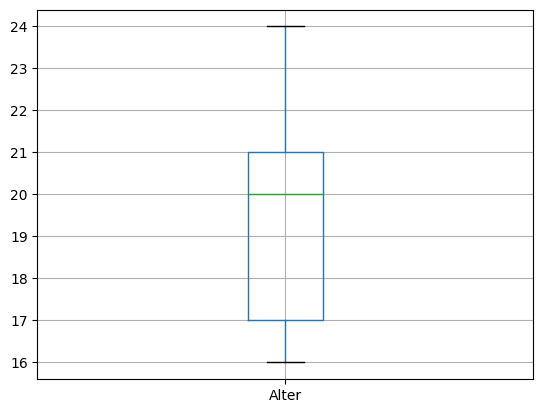

In [20]:
eissorten.boxplot('Alter')


Dem Boxplot kann man verschiedene Daten entnehmen: beginnen wir mit dem sogenannten Median.

#### Der Median

Wir sehen im obigen Schaubild auf der linken Achse den Altersbereich. Die Box in der Mitte zeigt, wie die Daten über den Altersbereich verteilt sind, und die grüne Linie in der Mitte dieser Box stellt den sogenannten Median dar.

---

**Der Median wird im Boxplot als waagrechte Linie innerhalb der Box dargestellt.**

---

Der Median ist der Wert, der bei den Daten in der Mitte liegt. Die Mitte - wie ist das zu verstehen? Sehen wir uns die Altersangaben der Personen in unserer Tabelle mal **nach dem Alter sortiert** an (den NA-Wert ignorieren wir hier, ein fehlender Wert kann schließlich nicht sortiert werden, er ist ja gar nicht "da"):

1. 16
2. 16
3. 17
4. 18
5. 20
6. 21
7. 21
8. 23
9. 24

Dann ist der mittlere Wert der fünfte - es gibt vier Werte vorher und vier Werte hinterher. Da der fünfte Wert in dieser sortierten Reihenfolge 20 ist, ist damit der Median für diese Daten 20. Das ist in diesem Fall sehr ähnlich zum Mittelwert: hier wäre der Mittelwert 19.5 gewesen.

Der Median macht vor allem dann Sinn, wenn Werte seltsam verteilt sind. Wäre hier z.B. Ahmed nicht 24, sondern 85 Jahre alt, hätten wir also fast ausschließlich junge Teilnehmende, und nur einen sehr alten. In der Liste oben würde sich also der Wert in der letzten Zeile verändern - er bliebe aber immer noch der größte Wert, d.h. alle anderen Zeilen bleiben unverändert, die Sortierung bleibt dieselbe. Daher bekämen wir immer noch 20 als Median, was das "typische" Alter der Teilnehmenden gut trifft. Der Mittelwert dagegen wäre 26.3 - das ist älter als ALLE jungen Teilnehmenden, weil Ahmeds hohes Alter den Mittelwert eben nach oben treibt. Der Median spiegelt also besser das typische Alter der Teilnehmenden wieder als der Mittelwert.

Ein weiterer Vorteil des Medians gegenüber dem Mittelwert ist, dass sicher gestellt wird, dass der Wert in den Daten auch vorhanden ist. Es gibt nämlich in der Gruppe hier niemanden, der in etwa 26.3 Jahre alt ist, während aufgrund der Definition des Medians für die Daten hier eben wirklich jemand mit einem Alter von 20 in der Tabelle zu finden sein muss - in diesem Fall sogar gleich 3 Teilnehmende.


> [ Das stimmt eigentlich nicht ganz: wenn wir eine gerade Zahl an Werten haben, gibt es keinen, der exakt in der Mitte liegt - und in diesem Fall wird für die Berechnung des Medians der Mittelwert der beiden mittleren Werte verwendet - der dann natürlich nicht exakt so in den Daten vorkommt - aber immerhin fast... ]




---

**Der Median gibt den mittleren Wert der Daten an: man berechnet ihn, indem man die Daten sortiert. Der Median ist der Wert, der genau in der Mitte liegt. Der Median ist insbesonders bei nicht normal verteilten Daten sinnvoller als der Mittelwert.**

---



Außer dem Median kann man im Boxplot auch die sogenannten Quartile erkennen. Sie werden im nächsten Abschnitt erklärt.

#### Die Quartile und der IQR



Wir zeigen hier nochmal den Boxplot von oben:

<Axes: >

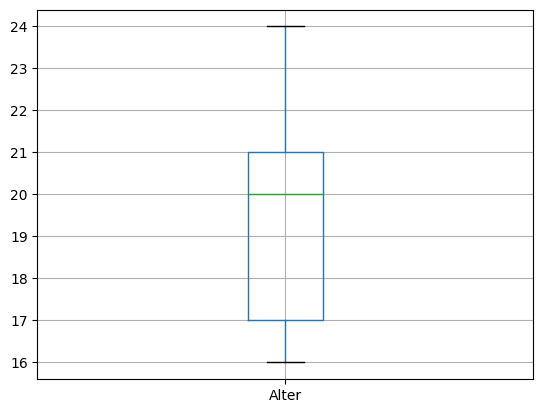

In [21]:
eissorten.boxplot()


Außer der grünen Linie sehen wir im Diagramm oben noch die bereits erwähnte Box - sie zeigt an, in welchem Bereich die mittleren 50% der Daten liegen. Die mittleren 50% sind logischerweise die 25% oberhalb des Medians und die 25% unterhalb des Medians.

Um die genauen Werte für die Box zu berechnen, teilt man die sortierten Daten in vier gleich große Intervalle ein, die jeweils 25% der Daten enthalten. Man teilt also nicht wie beim Median in zwei Hälften, sondern in vier Viertel.

Die Grenzen zwischen den Intervallen sind die sogenannten Quartile. Das sogenannte **untere Quartil** ist der Wert, bis zu dem man ein Viertel der Daten findet (die 25% niedrigsten Daten also). Das sogenannte **obere Quartil** ist der Wert, bis zu dem man drei Viertel der Daten findet (die 75% niedrigsten Daten also). Das mittlere Quartil wäre theoretisch der Wert, bis zu dem man die Hälfte oder 50% der Daten findet - und entspricht damit also genau dem Median.



---

**Das untere Quartil ist der Wert, unterhalb dessen man 25% der Daten findet. Das sogenannte obere Quartil ist der Wert, unterhalb dessen man 75% der Daten findet.**

---

Die Box in Boxplots zeigt also den Bereich, in dem 50% der Daten liegen, nämlich den Bereich zwischen dem oberen und dem unteren Quartil. Da unterhalb des unteren Quartils 25% der Daten liegen und oberhalb des oberen Quartils ebenso, befinden sich die restlichen 50% genau zwischen dem unteren und dem oberen Quartil.




---

**In Boxplots markiert die Box den Bereich zwischen oberem und unterem Quartil.**

---

Die Länge der Box entspricht damit exakt dem **Interquartilsabstand**, also der Differenz zwischen oberem und unterem Quartil. Auf Englisch bezeichnet man dies als **Interquartile Range**, und dies wird üblicherweise abgekürzt als **IQR**. Diese Abkürzung werden wir auch hier verwenden. Der Interquartilsabstand ist ein wichtiges Maß, der etwas darüber aussagt, wie stark die Daten verstreut sind - ist er groß, ist auch die Streuung der Daten groß.


---

**Der Interquartilsabstand (engl. Interquartile Range, IQR) ist der Abstand zwischen oberem und unterem Quartil.**

---

Auch die Quartile kann man sich von `pandas` direkt berechnen lassen. Allgemein spricht man bei der Aufteilung von sortierten Daten in verschiedene Bereiche von **Quantilen**. Das untere Quartil, das ja genau über den 25% niedrigsten Daten liegt, ist das 25%-Quantil, und das obere Quartil, unterhalb dessen man 75% der Daten findet, ist das 75%-Quantil.



---

**Das untere Quartil kann man allgemeiner auch als 25%-Quantil bezeichnen und das obere Quartil als 75%-Quantil.**

---

Die Quantile berechnet man mit der `pandas`-Methode quantile(). Als Argument spezifiziert man eine Liste der Quantile, die man haben möchte. Allerdings kann man die Quantile nicht in Prozent angeben, wir müssen in Dezimalbrüche umrechnen:

25%, das sind 25 von 100, also 25/100, und das ergibt in Dezimalschreibweise 0.25. Ebenso schreibt man statt 75% 0.75. Wir können hier direkt auch noch den Median ausgeben lassen, da er natürlich dem 50%-Quantil entspricht:

In [ ]:
eissorten.quantile([0.25, 0.5, 0.75])


Den Median kann man auch direkt mit seiner eigenen Methode `median()` berechnen lassen:

In [ ]:
print(eissorten['Alter'].median())


#### Die Antennen (Whiskers)

In den Boxplots oben gibt es außer der Box, die also die Quartile darstellt, auch zwei vertikale Linien, die sich über den Altersbereich erstrecken und mit zwei kleinen Querlinien enden. Diese Linien heißen auf Deutsch "Antennen" und auf Englisch "Whiskers" (also eigentlich: Schnurrhaare). Auch auf Deutsch findet man eigentlich häufiger die Bezeichung "Whiskers" statt "Antennen". Die Whiskers sollen anzeigen, welcher Datenbereich als "unauffällig" gilt. Dagegen könnte es sich bei allem, was außerhalb der Whiskers liegt, um Ausreißer handeln.

Im obigen Beispiel erstrecken sich die Whiskers über den ganzen Datenbereich, das ist aber nicht immer der Fall. Die Whiskers werden meist so eingezeichnet, dass sie maximal 1,5 mal so lang sind wie der Interquartilsabstand (also der IQR). In dem Fall geht der obere Whisker vom oberen Quartil bis zum letzten Datenpunkt, der nicht weiter als 1,5 mal den IQR vom oberen Quartil nach oben entfernt ist, und der untere Whisker geht vom unteren Quartil bis zum letzten Datenpunkt, der vom unteren Quartil nicht weiter als 1,5 mal den IQR nach unten entfernt ist. Sehen wir uns das an einem Beispiel an:



---

**Die Antennen oder Whiskers im Boxplot markieren den Bereich, in dem Daten liegen, die nicht mehr als das 1,5fache des IQR jenseits der Quartile liegen.**

**Daten innerhalb dieses Bereichs gelten als "unverdächtig", also nicht als Ausreißer.**

---

Im Beispiel oben lag das untere Quartil bei 17, das obere Quartil bei 21. Der IQR war also 4. Das 1,5fache des IQR ist damit 6. Der obere Whisker geht also von 21 bis maximal 21+6, also 27 - allerdings ist der größte Datenpunkt überhaupt nur 24, daher geht der obere Whisker eben nur bis zu diesem Punkt. So ähnlich sieht es auch beim unteren Whisker aus: er dürfte theoretisch nach unten bis 17-6, also bis 11, gehen, aber da niemand jünger als 16 ist, endet der Whisker mit diesem Punkt.

Anders sieht es aus, wenn wir annehmen, dass Ahmed 30 ist statt 24. Am IQR ändert sich nichts, da die Quartile gleich bleiben: wir haben nur den größten Datenpunkt verändert und aus der 24 eine 30 gemacht. Damit darf der obere Whisker nach wie vor nur bis maximal 27 gehen. Erstellen wir also den DataFrame nochmal neu und sehen den Boxplot an.

In [ ]:
# Numpy, um NA angeben zu können
import numpy

# Das Dictionary definieren
dict = { 'Name': ['Janina', 'Max', 'Özlem', 'Yannick', 'Lea', 'Sveta', 'Ahmed', 'Olivia','Maya','Sascha'],
        'Alter': [ 23, 17, 21, 18, 16, 16, 30, 21, 20, numpy.nan],
        'Lieblingseis': ['Joghurt', 'Pistazie', 'Erdbeer', 'Schoko', 'Schoko', 'Erdbeer', 'Erdbeer', 'Joghurt','Vanille','Schoko']}
# in DataFrame umwandeln
eissorten = pandas.DataFrame(dict)

Sehen wir nun den Boxplot an: der obere Whisker geht nun nur noch bis 23 - denn Ahmeds 30 Jahre liegen außerhalb des Bereichs, der für den Whisker möglich ist, und Janinas 23 Jahre ist nun das Alter, das gerade noch innerhalb des Bereichs für den oberen Whisker liegt. Der Whisker geht daher nun bis 23, und Ahmeds 30 Jahre werden als einzelner Punkt weiter oben eingezeichnet.

In [ ]:
eissorten.boxplot('Alter')

Wir haben hiermit also eine neue Methode, Ausreißer zu identifizieren, nämlich mithilfe der Whiskers im Boxplot: alles, was außerhalb der Whiskers liegt, ist "verdächtig". Ob nun allerdings verdächtige Datenpunkte wirklich entfernt werden müssen, hängt oft davon ab, was man mit den Daten vorhat. Im vorliegenden Fall sind die 30 Jahre vielleicht nicht so sehr aus dem Rahmen, dass es sich rechtfertigen lässt, diesen Datenpunkt einfach zu ignorieren (also z.B. durch NA zu ersetzen). Hier ist immer Vorsicht geboten.

### Ausreißer durch NA ersetzen

Boxplots sind also eine Möglichkeit, Daten auf Ausreißer zu untersuchen. Probieren wir das für die Bewölkungswerte in den Wetterdaten aus.

<Axes: >

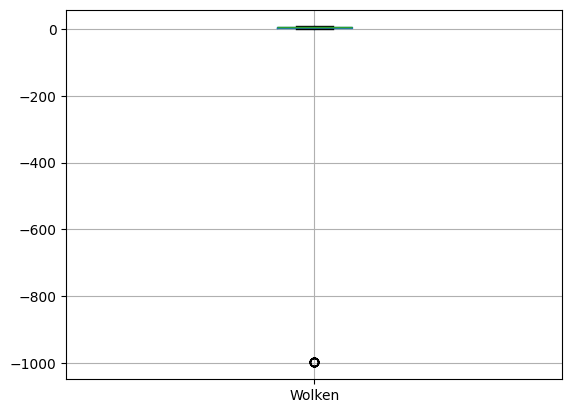

In [22]:
wetter.boxplot(column='Wolken')


Man kann oben sofort sehen, dass die Daten für die Wolken eine komische Verteilung haben: die Box und selbst die Whiskers sind so schmal, dass sie praktisch nicht zu erkennen sind, und ganz unten sieht man einen Datenpunkt, der weit von den Whiskers entfernt ist (tatsächlich wissen wir ja bereits, dass es sich bei diesem Punkt um mehrere Punkte mit Wert -999 handelt, die also alle an derselben Stelle liegen).

Was würde man also im Ernstfall mit diesen Punkten tun? In einem Fall wie diesem sind die Ausreißer so klar meilenweit von allen anderen Werten entfernt, dass hier kaum Zweifel bestehen - diese Werte sind höchst verdächtig, und selbst wenn man in der Dokumentation keinen Hinweis findet, woher die Ausreißer stammen, ist es ratsam, sie durch NA Werte zu ersetzen.

Wie macht man das? Sie haben bereits gelernt, wie man auf einzelne Werte in Tabellen zugreift: Wir können die gewünschten Zellen mithilfe eines Booleschen Vektors und des Spaltennamens identifizieren. Wir müssen vorher noch entscheiden, ab welchem Wert ein Datenpunkt als Ausreißer gilt. Folgen wir der Idee, dass alles außerhalb der Whiskers verdächtig ist, wären das also nach unten hin alle Datenpunkte, die mehr als den 1.5fachen IQR unterhalb des unteren Quartils liegen. Wir speichern dafür erst mal die Werte für das untere und das obere Quartil in zwei Variablen:

In [23]:
# Werte für unteres und oberes Quartil berechnen:
unteres_quartil = wetter['Wolken'].quantile(0.25)
oberes_quartil = wetter['Wolken'].quantile(0.75)

# und anzeigen lassen
# beachten Sie, dass der print-Befehl auch mehrere Argumente bekommen kann:
# hier jeweils einen String und die Variable
print('Unteres Quartil: ', unteres_quartil)
print('Oberes Quartil: ', oberes_quartil)

Unteres Quartil:  3.9
Oberes Quartil:  7.5


Anschließend können wir den IQR berechnen - damit es übersichtlich bleibt, speichern wir auch den in einer Variable, die wir hier IQR nennen (das ist nur der Name, den wir hier wählen, nicht etwa eine python-Funktion!).

In [24]:
# damit den IQR berechnen und in einer Variable IQR speichern
IQR = oberes_quartil - unteres_quartil
# und ausgeben
print('IQR: ', IQR)

IQR:  3.6


Damit können wir nun den Wert berechnen, ab dem Werte unterhalb des unteren Quartils als Ausreißer verdächtig sind - bezeichnen wir die Variable hierfür als untere_grenze:

In [25]:
# Grenze, ab wo man mehr als 1.5 mal IQR unterhalb des unteren Quartils liegt
untere_grenze = unteres_quartil - 1.5 * IQR
# im Notebook anzeigen lassen
print('Die untere Grenze ist: ', untere_grenze)

Die untere Grenze ist:  -1.5000000000000004


Wir sehen also, dass bei der Verteilung der Wolkendaten bereits alles unterhalb von -1.5 verdächtig ist. Wir können jetzt auf alle Werte zugreifen, die unterhalb dieser Grenze liegen:

In [26]:
# Zeilen mit verdaechtigen Werten anzeigen lassen
verdaechtig = wetter['Wolken'] < untere_grenze
wetter.loc[verdaechtig,'Wolken']


,Wolken
1439,-999.0
1440,-999.0
2328,-999.0
2356,-999.0
2357,-999.0
2925,-999.0
2954,-999.0
2963,-999.0
2964,-999.0
2965,-999.0


Vielleicht will man nicht immer so großzügig Werte als Ausreißer einstufen. Denn nicht immer handelt es sich bei Werten, die mehr als das 1,5fache des IQRs unter dem unteren Quartil liegen, auch ganz sicher um Messfehler. Im Prinzip kann man hier jeden beliebigen anderen Wert als Grenze wählen, solange er nach gründlichem Blick auf die Daten gerechtfertigt werden kann. Der oben berechnete Wert ist ein Grenze, die in der Statistik häufig verwendet wird, aber im Prinzip kann man immer auch andere Werte rechtfertigen. Wir könnten also statt den Wert oben genau zu berechnen auch willkürlich einen sinnvollen Wert wählen, wir könnten also z.B. einfach festlegen:

```
untere_grenze = -100
verdaechtig = wetter['Wolken'] < untere_grenze
wetter.loc[verdaechtig,'Wolken']

```

Wie auch immer man sich entscheidet: Jetzt fehlt nur noch, die Werte unterhalb der Grenze auch zu ändern. Das geht, indem man ihnen einfach einen neuen Wert zuweist - in unserem Fall am besten den NA-Wert, der von der numpy-Bibliothek zur Verfügung gestellt wird, wie wir in einem der vorigen Notebooks gelernt haben. Wir importieren also die Bibliothek und weisen den Wert `numpy.nan` dann allen Zellen zu, die verdächtige Werte enthielten:

In [27]:
# numpy importieren, damit na-Wert zur Verfügung steht
import numpy

# verdaechtige Werte ersetzen
wetter.loc[verdaechtig,'Wolken'] = numpy.nan

Wir können nun noch kurz überprüfen, ob das funktioniert hat (falls Sie misstrauisch sind). Der Boolesche Vektor, mit dem wir vorhin die verdächtigen Zeilen identifiziert haben, ist ja noch unverändert - er muss immer noch für alle verdächtigen Zeilen von vorhin ein True enthalten, da wir ihn berechnet haben, *bevor* wir die Werte korrigiert haben. Wenn wir ihn noch einmal für die Indizierung verwenden, sehen wir also, was in den betreffenden Zellen mittlerweile steht:

In [28]:
# diese Zellen nochmal anzeigen lassen
# der Vektor mit dem Namen verdaechtig
# enthält immer noch True für die vorhin verdächtigen Werte
wetter.loc[verdaechtig,'Wolken']

,Wolken
1439,NaN
1440,NaN
2328,NaN
2356,NaN
2357,NaN
2925,NaN
2954,NaN
2963,NaN
2964,NaN
2965,NaN


Das sieht also gut aus, überprüfen wir noch den Boxplot, um zu bestätigen, dass wir jetzt keine Werte mehr haben, die außerhalb der Whiskers liegen.

<Axes: >

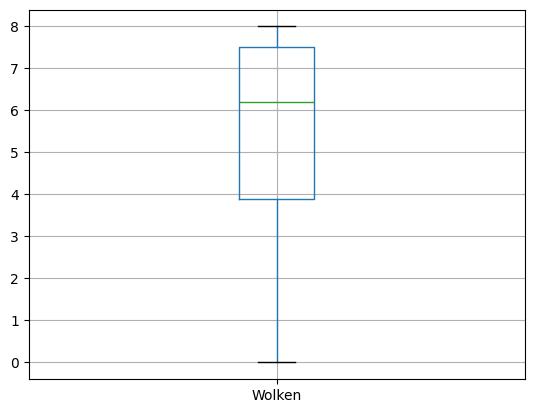

In [29]:
wetter.boxplot('Wolken')

## Werte durch Variablenzuweisung ersetzen

Sehen wir uns kurz noch genauer an, wie das Verändern von Werten per Variablenzuweisung funktioniert. Oben haben wir den DataFrame `wetter` mithilfe des Booleschen Vektors `verdaechtig` indiziert und dabei nur die Werte in der Spalte 'Wolken' anzeigen lassen, so:

In [30]:
wetter.loc[verdaechtig,'Wolken']

,Wolken
1439,NaN
1440,NaN
2328,NaN
2356,NaN
2357,NaN
2925,NaN
2954,NaN
2963,NaN
2964,NaN
2965,NaN


Wir sehen bei diesem Ausdruck also nur die Zellen, die in der Spalte Wolken liegen, und für die dieser Wert früher mal -999 gewesen war. Anschließend hatten wir die Werte in diesen Zellen durch NaN ersetzt, indem wir hinter den Ausdruck, der die betreffenden Zellen indiziert, einfach ein Gleichheitszeichen geschrieben haben, und dann einen Wert zugewiesen haben.

Genauso funktioniert das auch, wenn man sich nicht auf die eine Spalte beschränkt. Wählt man also z.B. nur

```
wetter.loc[verdaechtig]
```

aus, sieht man für die Zeilen, die vorhin die -999 enthielten, alle Spalten, nicht nur die mit den Wolken. Schreibt man hinter diesen Ausdruck einen neuen Wert, z.B. 'hallo', wird dieser Wert allen so ausgewählten Zellen zugewiesen:

In [31]:
wetter = wetter

wetter.loc[verdaechtig] = 'hallo'
wetter.loc[verdaechtig]

/tmp/ipython-input-182/657063440.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hallo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wetter.loc[verdaechtig] = 'hallo'
/tmp/ipython-input-182/657063440.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hallo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wetter.loc[verdaechtig] = 'hallo'


,Datum,Max,Wolken
1439,hallo,hallo,hallo
1440,hallo,hallo,hallo
2328,hallo,hallo,hallo
2356,hallo,hallo,hallo
2357,hallo,hallo,hallo
2925,hallo,hallo,hallo
2954,hallo,hallo,hallo
2963,hallo,hallo,hallo
2964,hallo,hallo,hallo
2965,hallo,hallo,hallo


---

**In DataFrames können Werte einfach ersetzt werden, indem man bestimmte Zeilen, Spalten oder Zellen indiziert und ihnen per Variablenzuweisung einen neuen Wert zuweist.**

---

So könnte man theoretisch auch ganze Spalten ersetzen (wobei man sich fragen kann, wozu das gut sein sollte, denn wenn alle Daten für eine Spalte, also eine Eigenschaft, dieselben Werte haben, was ist dann aus den Daten noch zu lernen?).

Probieren Sie es trotzdem mal selbst aus:

### Do it yourself: Spalte ersetzen

Wählen Sie die komplette Spalte Wolken aus und weisen Sie ihr einen Wert zu, z.B. 5.

In [34]:
# der Spalte Wolken den Wert 5 zuweisen
wetter["Wolken"] = 5


# die Spalte ausgeben lassen, um das Ergebnis zu überprüfen
wetter["Wolken"]

,Wolken
0,5
1,5
2,5
3,5
4,5
...,...
4012,5
4013,5
4014,5
4015,5


## Daten zusammenführen

Die Wetterdaten, die wir eben untersucht haben, sind für uns hier vor allem deswegen interessant, weil wir vermuten, dass das Wetter einen Einfluss auf die Eisverkäufe hat. Um das zu untersuchen, ist es sinnvoll, die Eisverkaufsdaten mit den Wetterdaten zusammen in eine gemeinsame Tabelle zu überführen.

Die Wetterdaten haben wir zwar oben bereits geladen, aber mittlerweile durch die Experimente mit dem Verändern von Werten 'ruiniert', wir laden daher hier nicht nur die Eisdaten, sondern auch die Wetterdaten nochmal neu.

Die `pandas`-Bibliothek hatten wir bereits weiter oben importiert. Allerdings kann es sein, dass Sie dieses Notebook nicht in einer Sitzung durcharbeiten, und die Bibliothek daher nicht mehr importiert ist. Sie können jetzt nach oben scrollen und die Zelle mit dem import-Befehl noch einmal ausführen; einfacher ist es vielleicht, wenn Sie aus dem Menü den Punkt Laufzeit -> Ausführung vor Zelle wählen. Dadurch werden alle Zellen, die oberhalb der aktuellen Zelle liegen, noch einmal ausgeführt und damit auch die `pandas`-Bibliothek importiert.

In [35]:
# Wetterdaten nochmal neu laden
wetter = pandas.read_csv(wetter_url)

# Eisdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url)


Sehen wir uns die beiden DataFrames noch einmal an:

In [36]:
print(wetter)
print(eis)

           Datum   Max  Wolken
0     2009-07-01  28.7     3.0
1     2009-07-02  29.5     2.3
2     2009-07-03  28.5     3.9
3     2009-07-04  27.9     2.8
4     2009-07-05  26.6     5.5
...          ...   ...     ...
4012  2020-06-25  26.5     1.1
4013  2020-06-26  29.8     3.6
4014  2020-06-27  28.8     3.6
4015  2020-06-28  25.7     6.9
4016  2020-06-29  24.0     6.6

[4017 rows x 3 columns]
          Datum  Wochentag  Portionen
0    2018-01-01          1        0.0
1    2018-01-02          2        0.0
2    2018-01-03          3       80.0
3    2018-01-04          4       35.0
4    2018-01-05          5       27.0
..          ...        ...        ...
360  2018-12-27          4        0.0
361  2018-12-28          5        0.0
362  2018-12-29          6        0.0
363  2018-12-30          0       13.0
364  2018-12-31          1        0.0

[365 rows x 3 columns]


### Schlüssel und Inner Join



Wichtig beim Zusammenführen von Daten ist es, zu klären, welche Instanzen jeweils zueinander gehören sollen. In den Daten oben ist es zum Beispiel so, dass der Datensatz, der bei den Wetterdaten den Index 1 hat, **nicht** zum Datensatz mit Index 1 in den Eisdaten gehört: beim Wetter hat der 1.7.2009 den Index 1, beim Eis dagegen der 1.1.2018. Innerhalb beider DataFrames ist der Index also zwar geeignet, um jeden Datensatz eindeutig identifizieren zu können, aber die Indizes passen nicht zusammen. Der Index ist in diesem Fall nicht hilfreich beim Zusammenführen.

Der Ausgabe oben können wir aber entnehmen, dass beide DataFrames das Datum in derselben Form enthalten, nämlich in der Schreibweise JJJJ-MM-TT. Zudem identifizieren nicht nur die Indizes in beiden DataFrames jeweils eindeutig bestimmte Zeilen, sondern auch das Datum erfüllt in beiden Fällen diese Funktion: wir haben jeweils keine zwei Zeilen mit demselben Datum. In der Terminologie der Datenbanken sagt man, das Datum ist in beiden Fällen als eindeutiger **Schlüssel** geeignet. (Dies gilt jeweils auch für die Indizes.)



---
**Als Schlüssel bezeichnet man Features, die jeden Datensatz eindeutig identifizieren.**

---



Das Datum erfüllt hier aber, im Gegensatz zu den beiden Indizes, zusätzlich die Anforderung, dass es für zusammengehörende Datensätze in beiden Tabellen identisch ist - die Zeile mit Datum '2018-01-01' zum Beispiel bezeichnet in beiden Tabellen denselben Tag. Wir wollen ja gerade die Eisverkäufe an jedem Tag mit den Wetterbedingungen eben dieses Tages zusammenbringen. Wir können das Datum daher als gemeinsamen Schlüssel für beide DataFrames verwenden.

---
**Beim Zusammenführen (auch: "Verbinden") von Daten benötigt man einen gemeinsamen Schlüssel für die verschiedenen Datenquellen.**

---

Das Zusammenführen erfolgt bei `pandas` durch die Funktion `merge`. Sie nimmt als Argumente zwei DataFrames. Zusätzlich benötigt man weitere Argumente, die bestimmen, welche Spalte(n) als Schlüssel verwendet werden sollen: `left_on` bestimmt den Schlüssel für den linken (d.h. den zuerst genannten) DataFrame, `right_on` den Schlüssel für den rechten, also zweiten, DataFrame.

Es soll hier allerdings nicht verschwiegen werden, dass die `merge`-Funktion in einem Fall wie diesem sogar intelligent genug ist, die Spalte 'Datum' als geeigneten Schlüssel zu identifizieren, wenn die beiden Argumente left_on und right_on nicht angegeben werden. Allerdings funktioniert das nur, wenn die Spalte in beiden DataFrames genau gleich benannt ist (hier beides Mal 'Datum') und außerdem in beiden Frames als Schlüssel geeignet (also eindeutig) ist. Hätten wir also in einem der DataFrames die Spaltenüberschrift "Tag" statt "Datum", müssten wir wirklich angeben, welche Spalten verwendet werden sollen.


In [41]:
# DataFrames wetter und eis zusammenführen
# Spalte 'Datum' als Schlüssel nutzen
gesamtdaten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum')
gesamtdaten

,Datum,Max,Wolken,Wochentag,Portionen
0,2018-01-01,9.4,6.6,1,0.0
1,2018-01-02,6.9,7.6,2,0.0
2,2018-01-03,13.1,7.6,3,80.0
3,2018-01-04,12.5,7.7,4,35.0
4,2018-01-05,11.5,7.7,5,27.0
...,...,...,...,...,...
360,2018-12-27,2.9,7.5,4,0.0
361,2018-12-28,2.1,6.9,5,0.0
362,2018-12-29,5.0,7.9,6,0.0
363,2018-12-30,6.0,7.8,0,13.0


Vielleicht ist Ihnen aufgefallen, dass der durch das Zusammenführen entstandene DataFrame nur noch die Daten für das Jahr 2018 enthält. Das liegt daran, dass bei `merge` standardmäßig, wenn man also nichts anderes explizit angibt, nur die Instanzen beibehalten werden, die in beiden DataFrames enthalten sind. Diese Art der Zusammenführung nennt sich **innerer Verbund** (auf Englisch **Inner Join**).

Hier gibt es für das Wetter deutlich mehr Instanzen (oder Datensätze) als für die Eisverkäufe: Für das Wetter reichen die Daten von Mitte 2009 bis Mitte 2020; für die Eisverkäufe ist nur das Jahr 2018 vorhanden. Beim Inner Join gibt es daher im resultierenden DataFrame ebenfalls nur noch Daten für das Jahr 2018. Eine Alternative wäre es, alle Instanzen zu übernehmen und die fehlenden Attribute mit NA-Werten aufzufüllen. Dies wäre dann ein **äußerer Verbund** oder **Outer Join**, und man würde in diesem Fall als weiteres Argument `how='outer'` angeben.

---
**Wenn beim Zusammenführen von Daten nur die Datensätze beibehalten werden, die in beiden Datenquellen vorhanden sind, spricht man von einem inneren Verbund oder Inner Join.**

**Wenn beim Zusammenführen von Daten alle Datensätze beibehalten werden, die in einer der Datenquellen vorhanden sind, spricht man von einem äußeren Verbund oder Outer Join. In diesem Fall werden die fehlenden Attribute mit NA-Werten aufgefüllt.**

---

### Do it yourself: Outer Join


Probieren Sie den Outer Join selbst aus: führen Sie in der folgenden Code-Zelle die beiden DataFrames zusammen, und spezifizieren Sie dabei zusätzlich das Argument how='outer'. Sehen Sie sich den entandenen DataFame an.

Wenn Sie Hilfe brauchen, finden Sie die Lösung ganz unten im Notebook unter Lösungen.

In [38]:
# Schreiben Sie den Code hier hin
# outer join für die DataFrames wetter und eis
gesamtdaten = pandas.merge(wetter,eis,left_on='Datum',right_on='Datum', how="outer")
gesamtdaten



,Datum,Max,Wolken,Wochentag,Portionen
0,2009-07-01,28.7,3.0,NaN,NaN
1,2009-07-02,29.5,2.3,NaN,NaN
2,2009-07-03,28.5,3.9,NaN,NaN
3,2009-07-04,27.9,2.8,NaN,NaN
4,2009-07-05,26.6,5.5,NaN,NaN
...,...,...,...,...,...
4012,2020-06-25,26.5,1.1,NaN,NaN
4013,2020-06-26,29.8,3.6,NaN,NaN
4014,2020-06-27,28.8,3.6,NaN,NaN
4015,2020-06-28,25.7,6.9,NaN,NaN


## Werte ersetzen

Zuletzt kann es für die Datenanalyse noch sinnvoll sein, bestimmte Werte in den Daten zu korrigieren oder auch Features zu ergänzen, die sich aus anderen Features berechnen lassen. Das haben wir oben für einzelne Werte schon gemacht: Sie haben bereits mithilfen von `loc` bestimmte Werte identifiziert und ihnen per Variablenzuweisung neue Werte zugewiesen.

Hier sehen wir uns jetzt noch an, wie man systematisch verschiedene Werte auf einmal in den Daten ersetzen kann. In den Eisverkaufsdaten haben wir z.B. die Wochentage vermerkt, aber sie sind nicht besonders verständlich für menschliche Leser, da sie durch Zahlen von 0 bis 6 bezeichnet werden.

Dabei steht 0 für Sonntag, 1 für Montag, 2 für Dienstag usw. Wollen wir statt dessen lieber die Wochentage als Strings angezeigt bekommen, könnten wir die Werte einfach im ganzen DataFrame ersetzen, und zwar so:

0 - Sonntag

1 - Montag

2 - Dienstag

3 - Mittwoch

4 - Donnerstag

5 - Freitag

6 - Samstag

pandas bietet für die Ersetzung die Methode `replace`, die auf Spalten von DataFrames angewandt werden kann. Sie bekommt als Argument zunächst eine Liste mit Werten, die ersetzt werden sollen, und als nächstes Argument eine genauso lange Liste mit den Werten, die statt dessen verwendet werden sollen. Dabei wird jeweils das erste Element durch das erste Element ersetzt, das zweite Element durch das zweite, und so weiter. (Dies funktioniert also wirklich nur, wenn beide Listen gleich lang sind.)

In unserem Fall können wir also als erste Liste angeben:

```[0,1,2,3,4,5,6]```

und als zweite Liste dann die Strings, durch die diese Zahlen ersetzt werden sollen:

```['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag']```


Da wir die Methode nur auf die Spalte mit den Wochentagen anwenden wollen (sonst würden wir z.B. auch Fälle von 0 in den Verkaufszahlen durch 'Sonntag' ersetzen), wenden wir diese Methode nicht auf die Variable `gesamtdaten` an, sondern auf die Spalte mit den Wochentagen, also auf:

`gesamtdaten['Wochentag']`

Auch dabei handelt es sich um einen DataFrame, wenn auch einen mit nur einer Spalte, und daher können wir auch auf dieses Objekt die Methode `replace` anwenden:


In [44]:
gesamtdaten['Wochentag'].replace([0,1,2,3,4,5,6],['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag'])

,Wochentag
0,Montag
1,Dienstag
2,Mittwoch
3,Donnerstag
4,Freitag
...,...
360,Donnerstag
361,Freitag
362,Samstag
363,Sonntag


Ein Problem gibt es nun aber noch: mit der Methode `replace` wird ein neues Objekt erzeugt, in dem diese Ersetzung stattfindet - das urpsrüngliche Objekt, `gesamtdaten`, bleibt unverändert. Das können wir hier leicht überprüfen:

In [43]:
gesamtdaten

,Datum,Max,Wolken,Wochentag,Portionen
0,2018-01-01,9.4,6.6,1,0.0
1,2018-01-02,6.9,7.6,2,0.0
2,2018-01-03,13.1,7.6,3,80.0
3,2018-01-04,12.5,7.7,4,35.0
4,2018-01-05,11.5,7.7,5,27.0
...,...,...,...,...,...
360,2018-12-27,2.9,7.5,4,0.0
361,2018-12-28,2.1,6.9,5,0.0
362,2018-12-29,5.0,7.9,6,0.0
363,2018-12-30,6.0,7.8,0,13.0


Offensichtlich sind hier noch die alten Werte vorhanden, denn in der Spalte mit den Wochentagen stehen immer noch Zahlen! Das liegt daran, dass das ursprüngliche Objekt, auf das wir  `replace` angewandt haben, unverändert geblieben ist.

Es gibt mehrere Lösungen für dieses Problem, zwei davon können wir mit dem bisher Gelernten schon sehr einfach anwenden: Die eine besteht darin, das neue Objekt als neue Spalte in den DataFrame einzufügen und somit anschließend beide Spalten zu haben: die alte mit den Zahlen für die Wochentage und die neue mit den ausgeschriebenen Wochentagen. Das kann durchaus wünschenswert sein. Die zweite Lösung besteht darin, der Originalspalte die neuen Werte zuzuweisen.

Beginnen wir mit Lösung eins: fügen wir eine neue Spalte ein.



## Spalten einfügen

Spalten einfügen ist sehr einfach: wir denken uns einen Namen aus und weisen anschließend der so benannten Spalte einen Vektor mit der korrekten Länge (also der Länge aller anderen Spalten im DataFrame) zu. In unserem Fall haben wir mit der durch die `replace`-Funktion veränderten Spalte 'Wochentag' ja bereits ein solches Objekt erzeugt. Wir können also einfach zuweisen:

In [45]:
# weise einer neuen Spalte 'Wochentag_Name'
# das Ersetzungsergebnis für die Spalte 'Wochentag' zu
gesamtdaten['Wochentag_Name'] = gesamtdaten['Wochentag'].replace([0,1,2,3,4,5,6],['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag'])
gesamtdaten

,Datum,Max,Wolken,Wochentag,Portionen,Wochentag_Name
0,2018-01-01,9.4,6.6,1,0.0,Montag
1,2018-01-02,6.9,7.6,2,0.0,Dienstag
2,2018-01-03,13.1,7.6,3,80.0,Mittwoch
3,2018-01-04,12.5,7.7,4,35.0,Donnerstag
4,2018-01-05,11.5,7.7,5,27.0,Freitag
...,...,...,...,...,...,...
360,2018-12-27,2.9,7.5,4,0.0,Donnerstag
361,2018-12-28,2.1,6.9,5,0.0,Freitag
362,2018-12-29,5.0,7.9,6,0.0,Samstag
363,2018-12-30,6.0,7.8,0,13.0,Sonntag


Alternativ hätten wir direkt die alte Spalte ersetzen können, wie oben schon gelernt. Der Code dafür hätte dann gelautet:

```
# weise der Spalte 'Wochentag'
# das Ersetzungsergebnis zu
gesamtdaten['Wochentag'] = gesamtdaten['Wochentag'].replace([0,1,2,3,4,5,6],['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag'])
```

Wir hätten dann im Unterschied zur ersten Lösung eben nicht mehr beides im DataFrame, die Wochentage in Zahlenform und in ausgeschriebener Form, sondern nur noch die ausgeschriebene Form.

Beachten Sie, dass das Zuweisen des neuen Objekts zu einer (neuen oder bereits existierenden) Spalte im Prinzip funktioniert wie das Zuweisen von einzelnen Werten weiter oben. Der Unterschied besteht nur darin, dass wir diesmal nicht der ganzen Spalte denselben Wert zuweisen wollen (ein NA, oder den String 'hallo', oder die Zahl 5), sondern dass wir verschiedene Werte in den Zeilen haben wollen. Dies funktioniert, wenn wir statt des einzelnen Werts einen Vektor mit der korrekten Länge zuweisen.

Wir hätten so auch oben verfahren können - statt allen 21 verdächtigen Wolkenwerten den Wert NA zuzuweisen, hätten wir auch einen Vektor mit 21 NA-Werten zuweisen können. Da immer durch denselben Wert ersetzt werden sollte, war es aber einfacher, den einzelnen Wert zu verwenden.


Wir haben durch das Zusammenführen der Daten nun die Möglichkeit, mithilfe unserer bisherigen Analyseinstrumente interessantere Fragen zu beantworten als bisher: Sie können nun zum Beispiel untersuchen, wieviel Eis im Schnitt verkauft wird, wenn die Temperaturen unter Null sind, oder wenn der Himmel bewölkt ist. Im Abschnitt Aufgaben unten finden Sie solche Fragen, versuchen Sie, diese zu beantworten. Vorher finden Sie aber noch eine Zusammenfassung der wichtigsten neu gelernten Dinge und die Lösungen für die Do-it-yourself-Aufgaben von weiter oben.

# Lösungen für die Do-it-yourself-Aufgaben

Sie finden im Folgenden die Lösung für die Do-it-yourself-Abschnitte oben.



### Negative Wolkenwerte

Beachten Sie, dass Sie vorher natürlich die Wetterdaten schon geladen und in der Variable wetter gespeichert haben müssen - das hatten wir oben in den ersten Zellen des Notebooks bereits gemacht.

Seither haben wir aber im DataFrame wetter die negativen Werte durch NA-Werte ersetzt. Wenn Sie also erst jetzt versuchen, diese Aufgabe zu lösen, müssen wir daher die NA-Werte darin noch einmal durch negative Werte ersetzen, sonst bekommen Sie keine negativen Wolkenwerte mehr. Führen Sie dafür ggf. den Code in der nächsten Zelle aus. Die Lösung für die Aufgabe oben finden Sie dann in der übernächsten Zelle.

In [47]:
# fehlende Bewölkungswerte finden und durch -999 ersetzen:
# a) Zeilen mit NA finden und entsprechenden Booleschen Vektor speichern
fehlende_werte = wetter['Wolken'].isna()
# b) der Spalte Wolken in diesen Zeilen den Wert -999 zuweisen
wetter.loc[fehlende_werte,'Wolken']=-999

Die Lösung ist dann folgende:

In [48]:
# Zeilen mit negativen Werten für Bewölkung
negative_werte = wetter['Wolken'] < 0
# nur diese Zeilen nehmen und darauf describe anwenden:
wetter.loc[negative_werte].describe()


,Max,Wolken
count,21.000000,21.0
mean,20.019048,-999.0
std,8.177018,0.0
min,3.800000,-999.0
25%,17.100000,-999.0
50%,21.700000,-999.0
75%,26.300000,-999.0
max,34.400000,-999.0


## Daten in einem bestimmten Bereich anzeigen lassen



Es wird vorausgesetzt, dass die Wetterdaten bereits geladen wurden.

Hierfür brauchen wir erst einen Vektor, der True ist, wenn die Temperatur sowohl 23 Grad oder mehr betrug, und außerdem nicht mehr als 24 Grad.

Ersteres drückt man aus durch:

```wetter['Max']>=23```

und Letzters durch:

```wetter['Max']<=24```

Kombiniert ergibt sich also für den Vektor zur Indizierung:



In [49]:
# Vektor für Tage mit mindestens 23 und nicht mehr als 24 Grad
wunschtemperatur = (wetter['Max']>=23) & (wetter['Max']<=24)

Um zu sehen, an wie vielen Tagen das Wetter so war, kann man sich diese Daten anzeigen lassen - die Anzahl der Datensätze wird dann unterhalb des DataFrames angezeigt:


In [50]:
# diese Daten anzeigen lassen:
wetter.loc[wunschtemperatur]

,Datum,Max,Wolken
11,2009-07-12,23.9,7.0
16,2009-07-17,23.7,6.8
19,2009-07-20,23.5,5.6
25,2009-07-26,24.0,0.8
30,2009-07-31,23.3,4.6
...,...,...,...
3933,2020-04-07,23.1,0.0
3944,2020-04-18,23.6,6.5
3976,2020-05-20,23.0,4.4
4007,2020-06-20,23.5,4.8


Alternativ kann man auch die Methode `count()` vom letzten Notebook verwenden, um die Zeilen direkt zu zählen:

In [51]:
# Anzahl der Zeilen wird unterhalb der ausgegebenen Daten angezeigt
# wer will, kann die Anzahl auch direkt ausgeben lassen:
wetter.loc[wunschtemperatur].count()

,0
Datum,151
Max,151
Wolken,151


## Spalte ersetzen

Auch hier wird vorausgesetzt, dass die Wetterdaten bereits geladen wurden.

In [52]:
# der Spalte Wolken den Wert 5 zuweisen
wetter['Wolken']=5

# die Spalte ausgeben lassen, um das Ergebnis zu überprüfen
wetter['Wolken']

,Wolken
0,5
1,5
2,5
3,5
4,5
...,...
4012,5
4013,5
4014,5
4015,5


## Outer Join

Beachten Sie auch hier, dass Sie Wetter- bzw. Eisdaten schon geladen und in den Variablen wetter bzw. eis gespeichert haben müssen.


In [53]:
# outer join für die DataFrames wetter und eis
# Spalte 'Datum' als Schlüssel nutzen
pandas.merge(wetter,eis,left_on='Datum',right_on='Datum',how='outer')


,Datum,Max,Wolken,Wochentag,Portionen
0,2009-07-01,28.7,5,NaN,NaN
1,2009-07-02,29.5,5,NaN,NaN
2,2009-07-03,28.5,5,NaN,NaN
3,2009-07-04,27.9,5,NaN,NaN
4,2009-07-05,26.6,5,NaN,NaN
...,...,...,...,...,...
4012,2020-06-25,26.5,5,NaN,NaN
4013,2020-06-26,29.8,5,NaN,NaN
4014,2020-06-27,28.8,5,NaN,NaN
4015,2020-06-28,25.7,5,NaN,NaN


# Zusammenfassung Datenanalyse

* Beim maschinellen Lernen bezeichnet man einzelne "Fälle" in den Daten als **Instanzen** und deren unterschiedliche Eigenschaften als **Features**. Üblicherweise stellen die Zeilen in Tabellen Instanzen dar; die Spalten geben dann die verschiedenen Features der Instanzen an.

* In der Terminologie relationaler Datenbanken bezeichnet man Instanzen als **Datensätze** und Features als **Attribute**.

* **Ausreißer** sind Datenpunkte, die - verglichen mit den anderen Werten - sehr aus dem Rahmen fallen.

* Ausreißer können beim Training von KI-Modellen Probleme machen und sollten daher vorher unbedingt identifiziert und evtl. eliminiert werden.

* **Histogramme** zeigen, wie sich Zahlenwerte über einen Wertebereich verteilen. Beim Erstellen von Histogrammen wird der vorhandene Wertebereich in mehrere Intervalle (sogenannte **Bins**) aufgeteilt. Im Histogramm wird jedes Intervall durch einen senkrechten Balken dargestellt. Die Höhe des Balkens zeigt an, wie viele Werte in diesem Intervall liegen.

* Mit Histogrammen kann man Ausreißer aufspüren.

* Der **Median** wird im Boxplot als waagrechte Linie innerhalb der Box dargestellt.

* Der Median gibt den mittleren Wert der Daten an: man berechnet ihn, indem man die Daten sortiert. Der Median ist der Wert, der genau in der Mitte liegt. Der Median ist insbesonders bei nicht normal verteilten Daten sinnvoller als der Mittelwert.

* Das **untere Quartil** ist der Wert, unterhalb dessen man 25% der Daten findet. Das sogenannte **obere Quartil** ist der Wert, unterhalb dessen man 75% der Daten findet.

* Das untere Quartil kann man allgemeiner auch als **25%-Quantil** bezeichnen und das obere Quartil als **75%-Quantil**.

* In Boxplots markiert die Box den Bereich zwischen oberem und unterem Quartil.

* Der **Interquartilsabstand** (engl. Interquartile Range, IQR) ist der Abstand zwischen oberem und unterem Quartil.

* Die **Antennen** oder **Whiskers** im Boxplot markieren den Bereich, in dem Daten liegen, die nicht mehr als das 1,5fache des IQR jenseits der Quartile liegen. Daten innerhalb dieses Bereichs gelten als "unverdächtig", also nicht als Ausreißer.

* Als **Schlüssel** bezeichnet man Features, die jeden Datensatz eindeutig identifizieren.

* Beim Zusammenführen (auch: "Verbinden") von Daten benötigt man einen gemeinsamen Schlüssel für die verschiedenen Datenquellen.

* Wenn beim Zusammenführen von Daten nur die Datensätze beibehalten werden, die in **beiden** Datenquellen vorhanden sind, spricht man von einem **inneren Verbund** oder **Inner Join**.

* Wenn beim Zusammenführen von Daten alle Datensätze beibehalten werden, die in einer der Datenquellen vorhanden sind, spricht man von einem **äußeren Verbund** oder **Outer Join**. In diesem Fall werden die fehlenden Attribute mit NA-Werten aufgefüllt.

# Zusammenfassung Programmieren

* Logische Ausdrücke können mit "und" bzw. "oder" verknüpft werden. Das Zeichen für "und" ist &, und das Zeichen für "oder" ist |. Die Teil-Ausdrücke werden in Klammern geschrieben.

* Histogramme bekommt man mit der Methode `hist()` für DataFrames. Als Argument kann man den gewünschten Spaltennamen angeben, sonst bekommt man Histogramme für alle Spalten, die Zahlen enthalten.

* Boxplots bekommt man mit der Methode `boxplot()` für DataFrames. Als Argument kann man den gewünschten Spaltennamen angeben, sonst bekommt man Boxplots für alle Spalten, die Zahlen enthalten.

* In DataFrames können Werte einfach ersetzt werden, indem man bestimmte Zeilen, Spalten oder Zellen indiziert und ihnen per Variablenzuweisung einen neuen Wert zuweist.

  * Handelt es sich bei dem neuen Wert um einen einzelnen Wert (also eine Zahl oder einen String), bekommen alle Zellen diesen Wert; ansonsten muss es sich um ein Objekt mit der richtigen Anzahl von Zeilen bzw. Spalten handeln.

* Das Zusammenführen von Daten erfolgt bei pandas durch die Funktion `merge()`. Sie nimmt als Argumente zwei DataFrames. Zusätzlich benötigt man weitere Argumente, die bestimmen, welche Spalte(n) als Schlüssel verwendet werden sollen: `left_on` bestimmt den Schlüssel für den linken (d.h. den zuerst genannten) DataFrame, `right_on` den Schlüssel für den rechten, also zweiten, DataFrame.

# Aufgaben

Die folgende Zelle können Sie nochmal ausführen, um sicherzustellen, dass alles geladen ist, wenn Sie die Aufgaben in einer neuen Sitzung angehen.

In [54]:
import pandas

# Wetterdaten nochmal neu laden
wetter_url = 'https://github.com/antje-schweitzer/wetterdaten/raw/main/wetterdaten.csv'
wetter = pandas.read_csv(wetter_url)

# Eisdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url)


## Histogramm für die Eisverkäufe



Erstellen Sie ein Histogramm für die verkauften Eismengen. Lassen Sie sich dafür zuerst noch einmal die Eisverkaufsdaten anzeigen (den DataFrame `eis`).



In [56]:
# Daten noch einmal anzeigen lassen
eis


,Datum,Wochentag,Portionen
0,2018-01-01,1,0.0
1,2018-01-02,2,0.0
2,2018-01-03,3,80.0
3,2018-01-04,4,35.0
4,2018-01-05,5,27.0
...,...,...,...
360,2018-12-27,4,0.0
361,2018-12-28,5,0.0
362,2018-12-29,6,0.0
363,2018-12-30,0,13.0


Identifizieren Sie die Spalte, die die Verkäufe enthält. Lassen Sie nun eine Histogramm für diese Spalte erstellen.


Lassen Sie jetzt ein Histogramm dieser Spalte erstellen.

array([[<Axes: title={'center': 'Portionen'}>]], dtype=object)

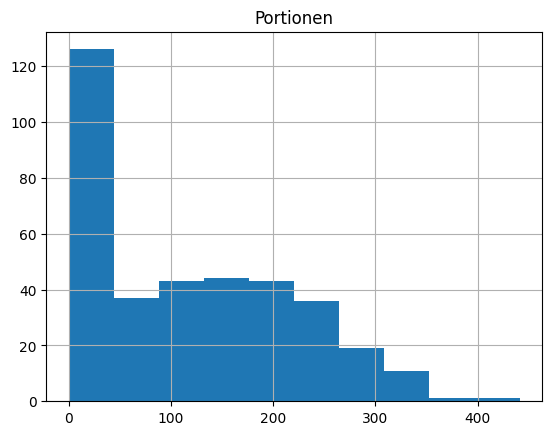

In [57]:
# Histogramm erstellen
eis.hist("Portionen")

Lesen Sie vom Histogramm ab:

* Im wievielten Bin finden sich die meisten Datenpunkte? (In welchem Bereich lagen die Verkäufe also an den meisten Tagen?)
* An wie vielen Tagen war das so (lesen Sie das ungefähr vom Histogramm ab)?
* ---

  👥👥👥 Diskutieren Sie in der Gruppe: Woran könnte das liegen?

  ---

* Abgesehen von diesem Bin: in welchem Bereich liegen die Eisverkäufe ansonsten am häufigsten? Es reicht, wenn Sie das grob ablesen.


## Boxplot für die Eisverkäufe

Produzieren Sie jetzt einen Boxplot für die Eisverkäufe.

<Axes: >

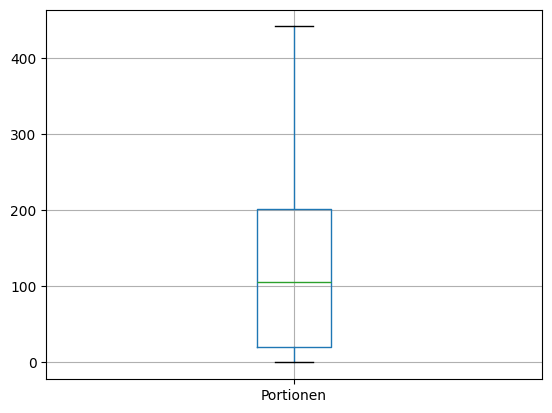

In [58]:
eis.boxplot("Portionen")

Beantworten Sie folgende Fragen:

* Gibt es Ausreißer? Ja
* Wo in etwa liegt der Median? 110
* Wo in etwa liegt das obere Quartil? 200 - 400

## Median und Mittelwert

Eben haben Sie schon den Median für die Verkäufe grob aus dem Boxplot abgelesen. Können Sie ihn auch genau berechnen? Evtl. hilft es, wenn Sie erst die Spalte anzeigen lassen, für die Sie den Median berechnen wollen:

In [59]:
# Spalte mit Portionen anzeigen lassen
eis["Portionen"]

,Portionen
0,0.0
1,0.0
2,80.0
3,35.0
4,27.0
...,...
360,0.0
361,0.0
362,0.0
363,13.0


Nun könnnen Sie darauf die Methode für den Median anwenden:

In [63]:
# Median berechnen
eis["Portionen"].median()

106.0

Berechnen Sie jetzt zum Vergleich den Mittelwert.

In [64]:
# Mittelwert
eis["Portionen"].mean()

np.float64(116.91689750692521)

---

👥👥👥 Diskutieren Sie in der Gruppe: Warum ist hier der Mittelwert höher als der Median?

---


## Werte ersetzen

Nehmen wir an, bei der Erfassung der Eisverkäufe gab es ein Problem - an den Tagen vom 10.7.2018 bis zum 12.7.2018 hat der Betreiber der Tankstelle vergessen, die verkauften Mengen in seine Tabelle einzutragen. Er hat daher für den 10. bis 12.7. 0 Verkäufe verbucht, und statt dessen alle Verkäufe für die insgesamt vier Tage für den 13.7. eingetragen.

Ihre Aufgabe ist es nun, die Verkäufe in den Eisdaten so zu verändern, dass genau dies der Fall ist.

Finden Sie zunächst heraus, wie viel Eis an den vier Tagen jeweils verkauft wurde, in dem Sie die Eisdaten für diese vier Tage anzeigen lassen. Das können Sie mithilfe einer Oder-Verknüpfung von vier logischen Ausdrücken erreichen: erstellen Sie einen Vektor, der True ist, wenn das Datum entweder '2018-07-10', '2018-07-11', '2018-07-12' oder '2018-07-13' ist und verwenden Sie ihn zur Indizierung der Daten in `eis`. Vergessen Sie nicht, dass Sie beim Abgleich der Strings in Ihrem logischen Ausdruck ein doppeltes Gleichheitszeichen benötigen!

In [74]:
# Boolescher Vektor für die vier Tage

vektor_tage = (eis["Datum"]=="2018-07-10") | (eis["Datum"]=="2018-07-11") | (eis["Datum"]=="2018-07-12") | (eis["Datum"]=="2018-07-13")

# Portionen für diese Tage anzeigen lassen.
eis.loc[vektor_tage, "Portionen"]

,Portionen
190,147.0
191,129.0
192,180.0
193,221.0


Falls Sie nicht gerne mit diesen Ausdrücken hantieren, gibt es auch noch die Möglichkeit, wie im [ersten Notebook](https://colab.research.google.com/drive/1HV5H_6W-xBzR3S0CZYhkDRhBg11So0BQ?usp=sharing) die Eisdaten so zu laden, dass das Datum als Index verwendet wird, und dann die Tage mithilfe von

```
eis.loc['2018-07-10':'2018-07-13']
```
als Bereich anzugeben. Diese Variante ist zugegeben auch etwas eleganter, aber Sie sollten ja auch nochmal üben, Boolesche Ausdrücke zu kombinieren. Falls Sie trotzdem mit dem Index arbeiten wollen, laden Sie die Eisdaten nochmal neu mit dem Datum als Index.


Wie viele Eis wurden insgesamt an diesen vier Tagen verkauft? Man kann dies auch direkt mit pandas berechnen, hier behelfen wir uns aber einfach damit, die Werte selbst aufzuaddieren, damit wir keine neue Funktion einführen müssen. Für die Addition können wir einfach dieses Notebook nutzen: wenn Sie in einer Code-Zelle mehrere Werte aufaddieren und die Zelle ausführen, sehen Sie die Summe, z.B. so:


In [68]:
4 + 3 + 2

9

Berechnen Sie die Verkäufe über die vier Tage.

In [69]:
147 + 129 + 180 + 221

677

Wir wollen nun die Daten so manipulieren, als wären für die ersten drei Tage jeweils 0 Portionen vermerkt, und für den vierten Tag dafür alle Verkäufe. Modifizieren Sie dafür die Werte im DataFrame: Wählen Sie die vier Zeilen so aus, wie Sie es oben gemacht haben, und weisen Sie ihnen dann den Vektor [0,0,0,677] zu. Wenn Sie nicht alle vier Werte gleichzeitig ändern wollen, könnnen Sie auch einen Tag nach dem anderen ändern, so wie wir es oben im Abschnitt "Werte durch Variablenzuweisung ersetzen" gemacht haben.

Achtung: Falls Sie die Daten nochmal geladen haben, mit dem Datum als Index, gibt es jetzt die Spalte 'Datum' nicht mehr. Daher können Sie die Zeilen jetzt nur noch mithilfe des Index auswählen, wie eben gezeigt.

Falls Sie lieber einen Booleschen Vektor (z.B. `viertage` von oben) verwenden wollen, müssen Sie die Daten nochmal laden, ohne die Spalte Datum als Index zu verwenden, also so:

```
eis = pandas.read_csv('https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv')
```

In [75]:
# Zellen fuer Verkaeufe der vier Tage auswaehlen und Vektor zuweisen
eis.loc[vektor_tage, "Portionen"]=[0,0,0,677]

# diese Zellen nochmal anzeigen lassen
eis.loc[vektor_tage, "Portionen"]

,Portionen
190,0.0
191,0.0
192,0.0
193,677.0


## Ausreißer suchen

Berechnen Sie nochmal einen Boxplot für die Eisverkäufe - finden Sie nun den manipulierten Wert als Ausreißer?

<Axes: >

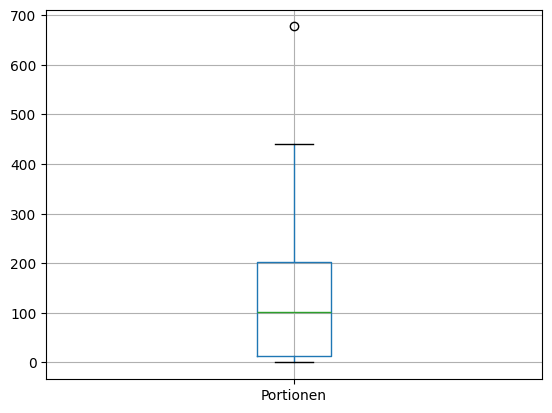

In [79]:
eis.boxplot("Portionen")

## Mit zusammengeführten Daten arbeiten

Wir führen hier noch einmal die Wetterdaten und die Eisdaten zusammen, diesmal nutzen wir aber in beiden Fällen das Datum als Index und spezifizieren beim Zusammenführen, dass die Indizes beibehalten werden sollen (left_index=True, right_index=True).

In [80]:
# Wetterdaten nochmal neu laden
wetter = pandas.read_csv(wetter_url,index_col='Datum')

# Eisdaten laden
eis_url = 'https://github.com/antje-schweitzer/eisverkauf2018/raw/main/eisverkauf.2018.csv'
eis = pandas.read_csv(eis_url,index_col='Datum')

# Daten mergen/zusammenfuehren
gesamtdaten = pandas.merge(eis,wetter,left_index=True, right_index=True)
gesamtdaten


,Wochentag,Portionen,Max,Wolken
Datum,,,,
2018-01-01,1,0.0,9.4,6.6
2018-01-02,2,0.0,6.9,7.6
2018-01-03,3,80.0,13.1,7.6
2018-01-04,4,35.0,12.5,7.7
2018-01-05,5,27.0,11.5,7.7
...,...,...,...,...
2018-12-27,4,0.0,2.9,7.5
2018-12-28,5,0.0,2.1,6.9
2018-12-29,6,0.0,5.0,7.9


Sie können durch Nutzung der gesamten Daten nun ganz neue Fragestellungen beantworten, die den Zusammenhang zwischen Wetter und Eisverkaufen analysieren:

* Wie viele Portionen Eis wurden im Schnitt verkauft, wenn die Höchsttemperatur über 30 Grad lag? Identifizieren Sie dafür alle Datensätze, bei denen die Temperatur über 30 Grad lag, und berechnen Sie den Mittelwert für die Daten in der Spalte 'Portionen'.
* Wie viele Portionen Eis wurden im Schnitt verkauft, wenn die Höchsttemperatur unter 10 Grad lag?
* Wie war die Höchsttemperatur im Schnitt, wenn mehr als 100 Portionen verkauft wurden?
* Wie viele Portionen Eis wurden im Schnitt an Tagen mit einer Bewölkung von über 7 verkauft?
* Wie viele Portionen Eis wurden im Schnitt an Tagen mit einer Bewölkung von unter 2 verkauft?
* Raten Sie aufgrund der so berechneten Verkaufszahlen: Stehen kleine Zahlen für mehr oder weniger Bewölkung? Weniger

In [88]:
# ueber 30 Grad
ueber_30 = gesamtdaten["Max"]>30
gesamtdaten.loc[ueber_30, "Portionen"].mean()

np.float64(255.82142857142858)

In [90]:
# unter 10 Grad
unter_10 = gesamtdaten["Max"]<10
gesamtdaten.loc[unter_10, "Portionen"].mean()

np.float64(9.06060606060606)

In [91]:
# mehr als 100 Portionen
pmehr_100 = gesamtdaten["Portionen"]>100
gesamtdaten.loc[pmehr_100, "Max"].max()

35.1

In [92]:
# Bewoelkung ueber 7
bueber_7 = gesamtdaten["Wolken"]>7
gesamtdaten.loc[bueber_7, "Portionen"].mean()

np.float64(60.86538461538461)

In [93]:
# Bewoelkung unter 2
bunter_2 = gesamtdaten["Wolken"]<2
gesamtdaten.loc[bunter_2, "Portionen"].mean()

np.float64(205.0)